# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importando a base de dados

In [2]:
#importação dos dados
df_desmatamento = pd.read_csv('desmatamento_ucs.csv', encoding='latin1', sep=";")
df_especies = pd.read_csv('pda-especies_ameacadas.csv', encoding='latin1', sep=";")

# Visão geral da base de dados

In [5]:
#base de dados de espécies
df_especies.describe()

,Reino,Filo,Classe,Ordem,Família,Gênero,Nome Científico,Autor,Nome Comum,Grupo,Categoria,Consta em Lista Nacional Oficial,Estado,Região,Bioma,Bacia Hidrográfica,Unidade de Conservação Federal,Unidade de Conservação Estadual,RPPN
count,1257,1256,1256,1256,1256,1256,1256,1244,1031,1256,1256,1256,1139,1139,1221,1081,118,68,58
unique,2,11,27,109,318,690,1256,998,689,10,9,1,266,26,60,421,99,61,39
top,Animalia,Chordata,Actinopterygii,Passeriformes,Rivulidae,Hypsolebias,Apareiodon davisi,"(Linnaeus, 1758)",Peixe-anual,Peixes Continentais,Vulnerável,Sim,Bahia,Sudeste,Mata Atlântica,Sub-bacia São Francisco Médio,REBIO do Gurupi,ÁREA DE PROTEÇÃO AMBIENTAL DO LAGO DE TUCURUI,RPPN Lote Cristalino
freq,1256,884,332,144,130,40,1,18,78,291,461,1256,126,309,386,76,5,5,8


In [4]:
#base de dados de desmatamento
df_desmatamento.describe()

,cnuc,uc,biocgfun,prodes,2021,2020,2019,2018,2017,2016,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1997
count,325,325,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,325,325,7,2,114,108,113,101,98,96,...,123,113,113,126,136,139,120,137,126,109
top,0000.00.0001,APA Anhatomirim,Amazônia,Sim,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,1,126,172,212,218,213,225,228,230,...,203,212,213,200,190,187,206,189,199,217


# Tratamento e limpeza dos dados

In [6]:
#tratamento da base de espécies
## limpeza dos dados
df_especies = df_especies[['Nome Científico', 'Nome Comum', 'Categoria', 'Grupo', 'Estado', 'Região', 'Bioma', 'Unidade de Conservação Federal']]

df_especies_sem_null = df_especies.dropna(subset='Nome Científico') #limpeza dos dados nulos

#tratamento das categorias repetidas / agrupamento
mascara_vulneravel = df_especies_sem_null['Categoria'] == 'Vulnerável (VU)'
df_especies_sem_null.loc[mascara_vulneravel, 'Categoria'] = 'Vulnerável'

mascara_em_perigo = df_especies_sem_null['Categoria'] == 'Em Perigo (EN)'
df_especies_sem_null.loc[mascara_em_perigo, 'Categoria'] = 'Em Perigo'

mascara_criticamente_em_perigo = df_especies_sem_null['Categoria'] == 'Criticamente em Perigo (CR)'
df_especies_sem_null.loc[mascara_criticamente_em_perigo, 'Categoria'] = 'Criticamente em Perigo'

mascara_extinta= (df_especies_sem_null['Categoria'] == 'Regionalmente Extinta') | (df_especies_sem_null['Categoria'] == 'Extinta na Natureza')
df_especies_sem_null.loc[mascara_extinta, 'Categoria'] = 'Extinta'

df_especies_tratado = df_especies_sem_null

df_especies_tratado

C:\Users\edugc\AppData\Local\Temp\ipykernel_8096\3566561836.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especies_sem_null.loc[mascara_vulneravel, 'Categoria'] = 'Vulnerável'
C:\Users\edugc\AppData\Local\Temp\ipykernel_8096\3566561836.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especies_sem_null.loc[mascara_em_perigo, 'Categoria'] = 'Em Perigo'
C:\Users\edugc\AppData\Local\Temp\ipykernel_8096\3566561836.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,Nome Científico,Nome Comum,Categoria,Grupo,Estado,Região,Bioma,Unidade de Conservação Federal
0,Apareiodon davisi,Peixe-rei,Em Perigo,Peixes Continentais,"Ceará, Paraíba, Pernambuco, Rio Grande do Norte",Nordeste,"Caatinga, Mata Atlântica",NaN
1,Myloplus tiete,Pacu-prata,Em Perigo,Peixes Continentais,"Goiás, Mato Grosso do Sul, Minas Gerais, Paran...","Centro-Oeste, Sudeste, Sul","Cerrado, Mata Atlântica",NaN
2,Brycon devillei,Piabinha,Em Perigo,Peixes Continentais,"Bahia, Minas Gerais","Nordeste, Sudeste","Cerrado, Mata Atlântica",NaN
3,Bryconamericus lambari,Lambari,Em Perigo,Peixes Continentais,Rio Grande do Sul,Sul,Mata Atlântica,NaN
4,Diapoma pyrrhopteryx,Lambari,Em Perigo,Peixes Continentais,"Rio Grande do Sul, Santa Catarina",Sul,"Mata Atlântica, Pampa",NaN
...,...,...,...,...,...,...,...,...
1251,Sluysia triapertura,NaN,Criticamente em Perigo,Invertebrados de Água Doce,Rio Grande do Norte,Nordeste,Caatinga,NaN
1252,Girardia arenicola,Planária,Criticamente em Perigo,Invertebrados de Água Doce,São Paulo,Sudeste,Mata Atlântica,NaN
1253,Girardia paucipuntacta,Planária,Criticamente em Perigo,Invertebrados de Água Doce,São Paulo,Sudeste,Mata Atlântica,NaN
1254,Bouchardia rosea,braquiópode,Em Perigo,Invertebrados Marinhos,NaN,NaN,Marinho,NaN


In [7]:
#tratamento base de desmantamento
# Como a coluna "cnuc" não tem informação relevante, excluiremos da base.
df_desmatamento = df_desmatamento.drop("cnuc",axis=1)

# Coletando os índices das linhas onde na coluna "prodes" existe valor "Não" e obedece demais comparações
index_names = df_desmatamento[ ((df_desmatamento['prodes'] == 'Não') & (df_desmatamento['2018'] == '12,5858')) | ((df_desmatamento['prodes'] == 'Não') & (df_desmatamento['2021'] == '33,4555')) | ((df_desmatamento['prodes'] == 'Não') & (df_desmatamento['2021'] == '3,2901'))].index

df_3linhas = df_desmatamento.iloc[index_names]

# Coletando os índices das linhas onde na coluna "prodes" existe valor "Não"
index_names = df_desmatamento[df_desmatamento['prodes'] == 'Não'].index

# Excluiremos as linhas com base no filtro anterior
df_desmatamento.drop(index_names, inplace = True)

#  Juntar (ou combinar) dois DataFrames com as mesmas colunas usando a função concat.
df_desmatamento = pd.concat([df_desmatamento, df_3linhas], ignore_index=True)

# Excluindo a coluna "prodes" pois não precisaremos mais dela
df_desmatamento = df_desmatamento.drop("prodes",axis=1)

# Renomeando a coluna 'uc' para 'Unidade de Conservação Federal'
df_desmatamento.rename(columns={'uc': 'Unidade de Conservação Federal'}, inplace=True)

df_desmatamento['2021'] = df_desmatamento['2021'].str.replace(',', '.')
df_desmatamento['2021'] = df_desmatamento['2021'].astype(np.float32)

# Análise por grupos de espécies

'\nCom base no gráfico, é possível constatar que os grupos com maior incidência na lista de espécies ameaçadas \nsão Peixes Continentais, Invertebrados Terrestres e Aves, respectivamente. Em contrapartida, os grupos menos preocupantes \nsão os Mamíferos Aquáticos e Invertebrados Marinhos, respectivamente.\n'

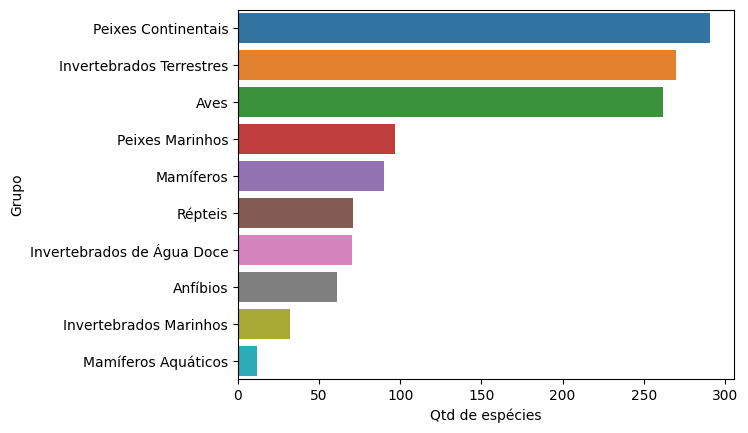

In [8]:
#Distribuição das espécies por grupo
ax = sns.countplot(data=df_especies_tratado, y='Grupo', order=df_especies_tratado['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax.set_xlabel('Qtd de espécies')

'''
Com base no gráfico, é possível constatar que os grupos com maior incidência na lista de espécies ameaçadas 
são Peixes Continentais, Invertebrados Terrestres e Aves, respectivamente. Em contrapartida, os grupos menos preocupantes 
são os Mamíferos Aquáticos e Invertebrados Marinhos, respectivamente.
'''

'Com base no gráfico, é possível constatar que os únicos grupos que contém espécies extintas\n são: Aves, Anfíbios e Mamíferos, mas ainda assim com baixa incidência.'

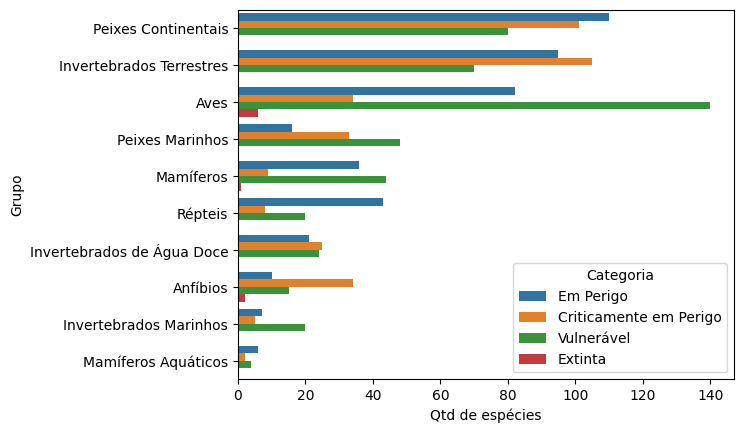

In [9]:
#Distribuição das espécies por grupo realicionadas ao risco de extinção
ax = sns.countplot(data=df_especies_tratado, y='Grupo', hue='Categoria', order=df_especies_tratado['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax.set_xlabel('Qtd de espécies')

'''Com base no gráfico, é possível constatar que os únicos grupos que contém espécies extintas
 são: Aves, Anfíbios e Mamíferos, mas ainda assim com baixa incidência.'''

Text(0.5, 0, 'Qtd de espécies vulneráveis')

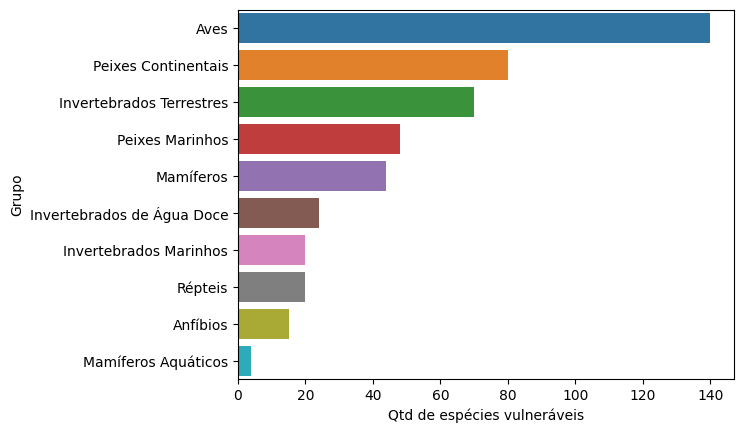

In [10]:
#Distribuição de espécies vulneráveis por grupo.
df_vulneravel = df_especies_tratado[df_especies_tratado['Categoria'] == 'Vulnerável']
ax1 = sns.countplot(data=df_vulneravel, y='Grupo', order=df_vulneravel['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax1.set_xlabel('Qtd de espécies vulneráveis')

Text(0.5, 0, 'Qtd de espécies em perigo')

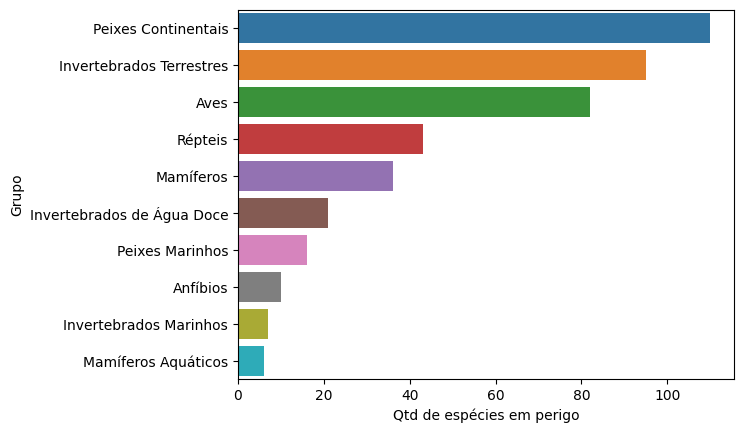

In [11]:
#Distribuição de espécies em perigo por grupo
df_em_perigo = df_especies_tratado[df_especies_tratado['Categoria'] == 'Em Perigo']
ax2 = sns.countplot(data=df_em_perigo, y='Grupo', order=df_em_perigo['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax2.set_xlabel('Qtd de espécies em perigo')

Text(0.5, 0, 'Qtd de espécies criticamente em perigo')

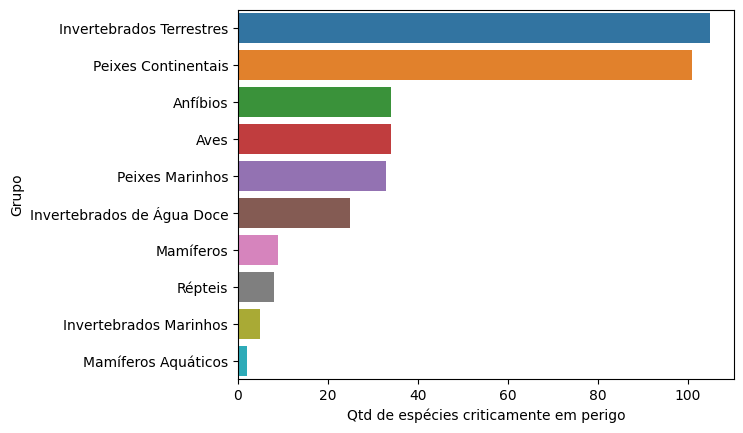

In [12]:
#Distribuição de espécies criticamente em perigo por grupo
df_criticamente_em_perigo = df_especies_tratado[df_especies_tratado['Categoria'] == 'Criticamente em Perigo']
ax3 = sns.countplot(data=df_criticamente_em_perigo, y='Grupo', order=df_criticamente_em_perigo['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax3.set_xlabel('Qtd de espécies criticamente em perigo')

Text(0.5, 0, 'Qtd de espécies extintas')

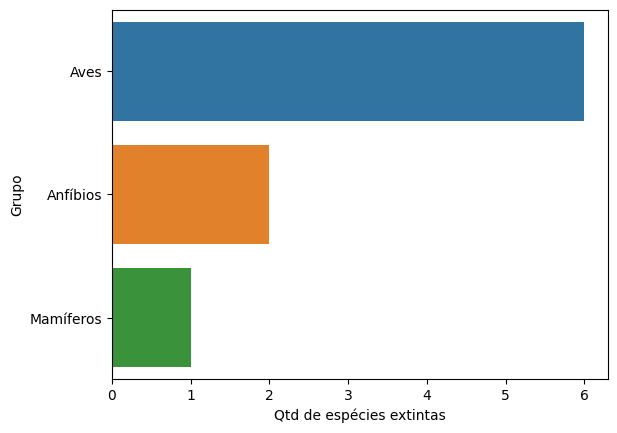

In [13]:
#Distribuição de espécies extintas por grupo
df_extinta = df_especies_tratado[df_especies_tratado['Categoria'] == 'Extinta']
ax4 = sns.countplot(data=df_extinta, y='Grupo', order=df_extinta['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax4.set_xlabel('Qtd de espécies extintas')

# Análise por categoria de risco de extinção

'\ninsights:\né possível observar que a população de espécies com um grau de risco de extinção mais elevado são menos numerosas\nque as espécies com um grau de risco de extinção menos elevado.\n\n'

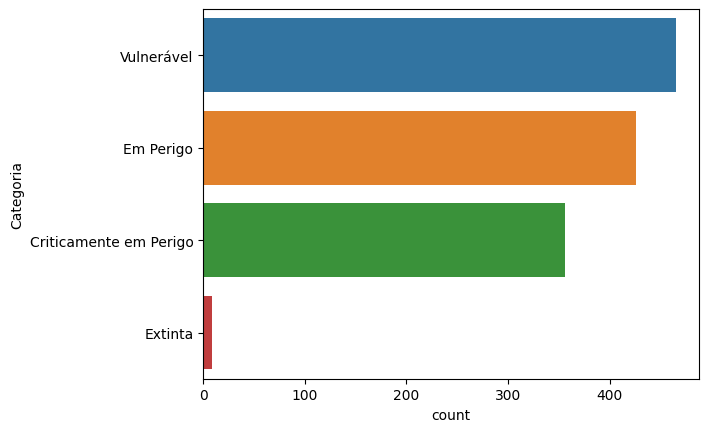

In [14]:
#qual a quantidade de espécies por categoria de extinção?
sns.countplot(df_especies_tratado, y="Categoria", order = df_especies_tratado["Categoria"].value_counts().index.tolist())

'''
insights:
é possível observar que a população de espécies com um grau de risco de extinção mais elevado são menos numerosas
que as espécies com um grau de risco de extinção menos elevado.

'''

C:\Users\edugc\AppData\Local\Temp\ipykernel_8096\762483123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especies_com_coluna_ucf['Localizada em UCF'] = mascara_com_uc


' \ninsights:\n\nÉ possível observar não existe nenhuma espécie extinta que estava protegida em uma unidade de conservação federal\nAlém disso, é possivel notar que as espécies com um grau de risco de extinção mais elevado estão em menor quantidade nas unidades de conservação, se comparadas\nas espécies que não estão protegidas por uma unidade de conservação\n'

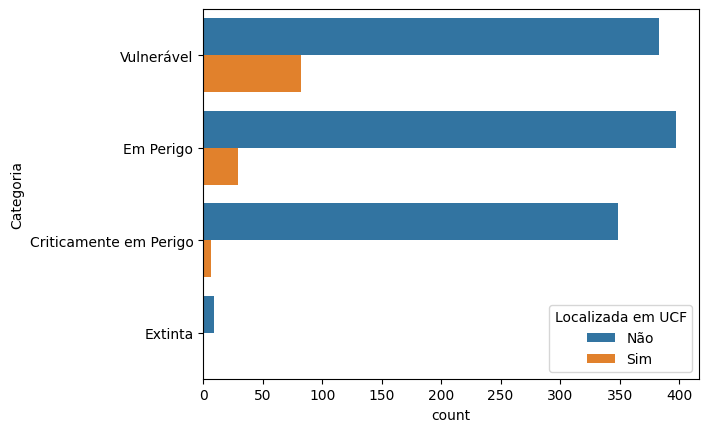

In [15]:
#qual a quantidade de espécies por categoria de extinção em unidades de conservação?
mascara_sem_uc = df_especies_tratado['Unidade de Conservação Federal'].isnull()
mascara_com_uc = (~mascara_sem_uc)

df_especies_com_coluna_ucf = df_especies_tratado
df_especies_com_coluna_ucf['Localizada em UCF'] = mascara_com_uc
df_especies_tratado.loc[mascara_com_uc, 'Localizada em UCF'] = 'Sim'
df_especies_tratado.loc[mascara_sem_uc, 'Localizada em UCF'] = 'Não'

df_especies_com_coluna_ucf['Localizada em UCF'].value_counts()

sns.countplot(df_especies_com_coluna_ucf, y="Categoria", hue='Localizada em UCF', order = df_especies_com_coluna_ucf["Categoria"].value_counts().index.tolist())

''' 
insights:

É possível observar não existe nenhuma espécie extinta que estava protegida em uma unidade de conservação federal
Além disso, é possivel notar que as espécies com um grau de risco de extinção mais elevado estão em menor quantidade nas unidades de conservação, se comparadas
as espécies que não estão protegidas por uma unidade de conservação
'''

# Análise de desmantamento em Unidades de Conservação Federal

In [16]:
#média de desmatamento por bioma
df_desmatamento.groupby('biocgfun')['2021'].mean().sort_values(ascending=False)

biocgfun
Caatinga            1666.039551
Amazônia             500.150696
Cerrado               98.581757
Marinho-Costeiro      91.533203
Mata Atlântica         0.000000
Name: 2021, dtype: float32

<Axes: xlabel='2021', ylabel='biocgfun'>

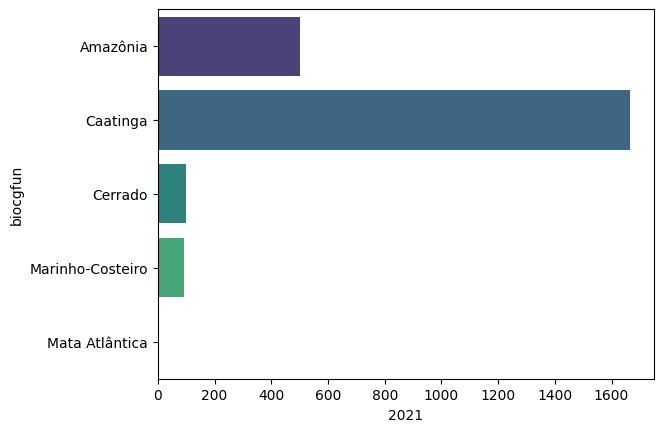

In [17]:
# Calc a média agrupada por biocgfun
media_por_bioma = df_desmatamento.groupby('biocgfun')['2021'].mean().reset_index()


sns.barplot(x='2021', y='biocgfun', data=media_por_bioma, palette='viridis')

# Análise de espécies por bioma

In [18]:
# criação do dataframe que relaciona espécies por bioma
categoria_por_bioma = []

biomas = ['Amazônia', 'Caatinga', 'Cerrado', 'Marinho', 'Mata Atlântica', 'Pampa', 'Pantanal', 'Desconhecido']

for i in biomas:
    vulneravel_por_bioma = 0
    perigo_por_bioma = 0
    criticamente_em_perigo_por_bioma = 0
    extinta_por_bioma = 0

    index_linha = -1
    for j in df_especies_tratado['Bioma'].astype(str):
        index_linha = index_linha + 1
        if j.count(i) == 0:
            continue     
           
        if df_especies_tratado['Categoria'][index_linha] == 'Vulnerável':
            vulneravel_por_bioma = vulneravel_por_bioma + 1
        elif df_especies_tratado['Categoria'][index_linha] == 'Em Perigo':
            perigo_por_bioma = perigo_por_bioma + 1           
        elif df_especies_tratado['Categoria'][index_linha] == 'Criticamente em Perigo':
            criticamente_em_perigo_por_bioma = criticamente_em_perigo_por_bioma + 1
        elif df_especies_tratado['Categoria'][index_linha] == 'Extinta':
            extinta_por_bioma = extinta_por_bioma + 1
    quantidade_total = vulneravel_por_bioma + perigo_por_bioma + criticamente_em_perigo_por_bioma + extinta_por_bioma
    categoria_por_bioma.append([i, quantidade_total, vulneravel_por_bioma, perigo_por_bioma, criticamente_em_perigo_por_bioma, extinta_por_bioma])

df_biomas = pd.DataFrame(categoria_por_bioma, columns=['Bioma', 'Quantidade de Espécies', 'Vulnerável', 'Em Perigo', 'Criticamente em Perigo', 'Extinta'])
'''
Podemos observar que a quantidade de espécies em cada categoria é bem distribuida
descrescendo levemente ao aumentar o grau de perigo da categoria, exceto em
extinto que são poucos as espécies extintas. 
'''
df_biomas


,Bioma,Quantidade de Espécies,Vulnerável,Em Perigo,Criticamente em Perigo,Extinta
0,Amazônia,228,141,51,35,1
1,Caatinga,189,69,86,34,0
2,Cerrado,349,154,122,73,0
3,Marinho,203,104,52,47,0
4,Mata Atlântica,627,209,231,183,4
5,Pampa,88,44,29,15,0
6,Pantanal,40,32,5,2,1
7,Desconhecido,12,5,5,1,1


In [19]:
# estatísticas do dataframe espécies por bioma
df_biomas.describe()

,Quantidade de Espécies,Vulnerável,Em Perigo,Criticamente em Perigo,Extinta
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,217.000000,94.750000,72.625000,48.750000,0.875000
std,198.789192,69.713188,75.253737,59.312128,1.356203
min,12.000000,5.000000,5.000000,1.000000,0.000000
25%,76.000000,41.000000,23.000000,11.750000,0.000000
50%,196.000000,86.500000,51.500000,34.500000,0.500000
75%,258.250000,144.250000,95.000000,53.500000,1.000000
max,627.000000,209.000000,231.000000,183.000000,4.000000


<Axes: xlabel='Quantidade de Espécies'>

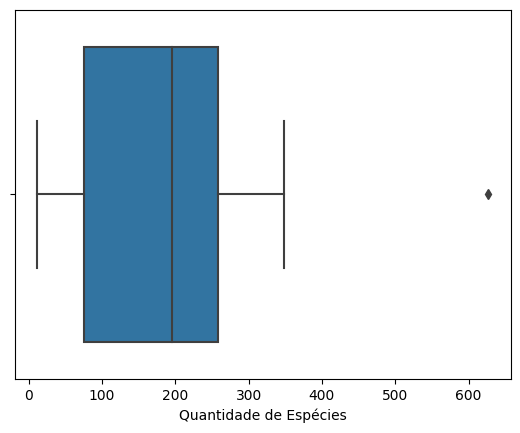

In [20]:
# boxplot da quantidade de espécies por bioma
sns.boxplot(df_biomas, x="Quantidade de Espécies", orient="h")

<Axes: xlabel='Quantidade de Espécies', ylabel='Bioma'>

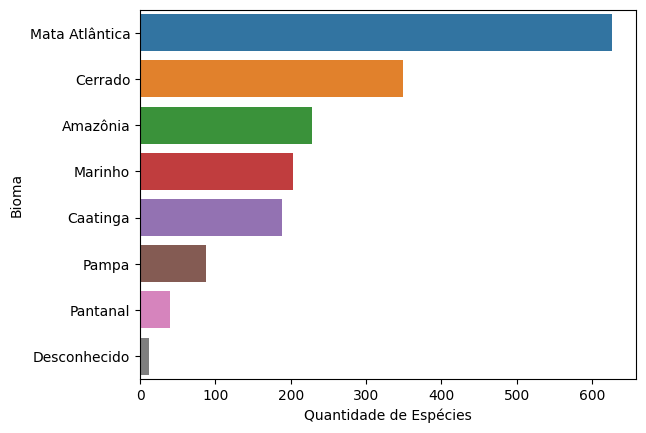

In [21]:
# Gráfico da quantidade de espécies por bioma
df_biomas = df_biomas.sort_values(by='Quantidade de Espécies', ascending=False)
sns.barplot(df_biomas, x="Quantidade de Espécies", y="Bioma", estimator=np.median, errorbar=None)

<Axes: xlabel='Vulnerável', ylabel='Bioma'>

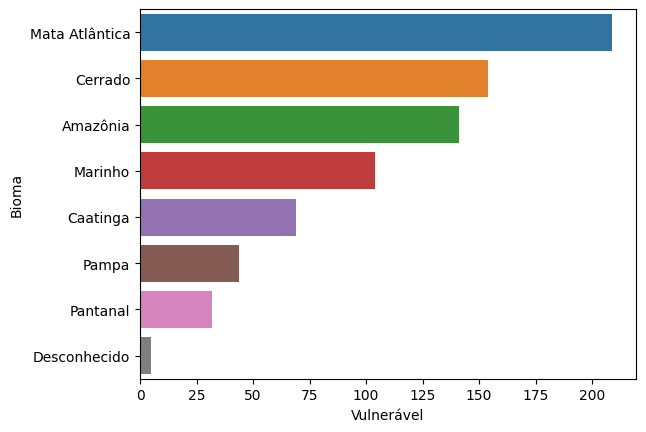

In [22]:
# Gráfico da quantidade de espécies na categoria vunerável por bioma
plt.figure()
df_biomas = df_biomas.sort_values(by='Vulnerável', ascending=False)
sns.barplot(df_biomas, x="Vulnerável", y="Bioma",errorbar=None)

<Axes: xlabel='Em Perigo', ylabel='Bioma'>

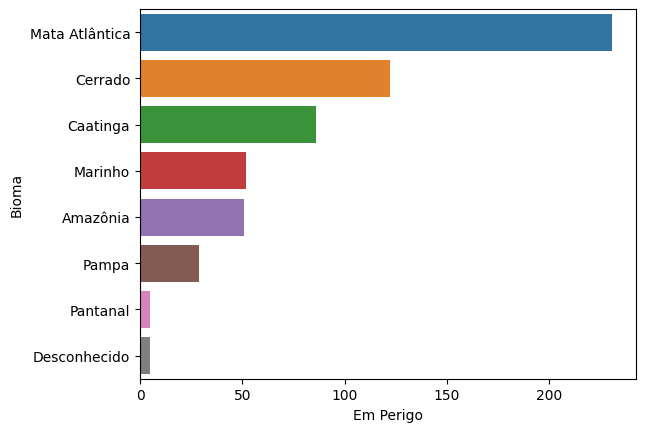

In [23]:
# Gráfico da quantidade de espécies na categoria em perigo por bioma
plt.figure()
df_biomas = df_biomas.sort_values(by='Em Perigo', ascending=False)
sns.barplot(df_biomas, x="Em Perigo", y="Bioma", errorbar=None)

<Axes: xlabel='Criticamente em Perigo', ylabel='Bioma'>

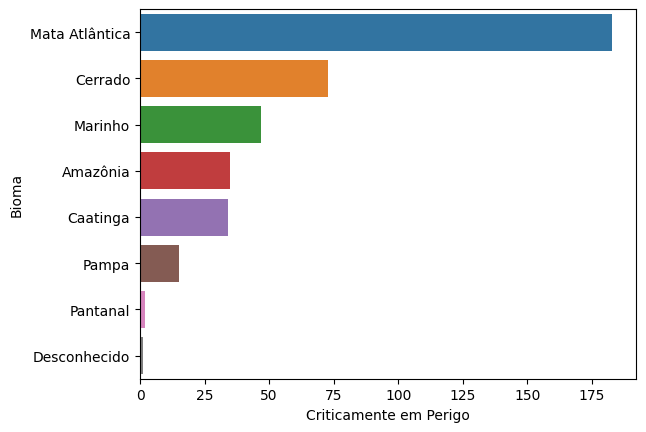

In [24]:
# Gráfico da quantidade de espécies na categoria criticamente em perigo por bioma
plt.figure()
df_biomas = df_biomas.sort_values(by='Criticamente em Perigo', ascending=False)
sns.barplot(df_biomas, x="Criticamente em Perigo", y="Bioma", errorbar=None)

<Axes: xlabel='Extinta', ylabel='Bioma'>

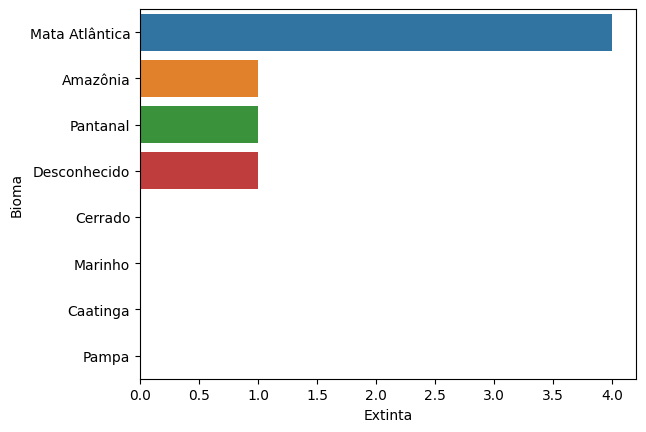

In [25]:
# Gráfico da quantidade de espécies na categoria extinta por bioma
plt.figure()
df_biomas = df_biomas.sort_values(by='Extinta', ascending=False)
sns.barplot(df_biomas, x="Extinta", y="Bioma",errorbar=None)

# Análise de espécies por estado

In [26]:
# criação do dataframe que relaciona espécies por estado

categoria_por_estado = []

estados = ["Acre", "Alagoas", "Amapá", "Amazonas", "Bahia", "Ceará",
    "Distrito Federal", "Espírito Santo", "Goiás", "Maranhão",
    "Mato Grosso", "Mato Grosso do Sul", "Minas Gerais",
    "Pará", "Paraíba", "Paraná", "Pernambuco", "Piauí", "Rio de Janeiro",
    "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia", "Roraima",
    "Santa Catarina", "São Paulo", "Sergipe", "Tocantins"]

for i in estados:
    vulneravel_por_estado = 0
    perigo_por_estado = 0
    criticamente_em_perigo_por_estado = 0
    extinta_por_estado = 0

    index_linha = -1
    for j in df_especies_tratado['Estado'].astype(str):
        index_linha = index_linha + 1
        if j.count(i) == 0:
            continue     
           
        if df_especies_tratado['Categoria'][index_linha] == 'Vulnerável':
            vulneravel_por_estado = vulneravel_por_estado + 1
        elif df_especies_tratado['Categoria'][index_linha] == 'Em Perigo':
            perigo_por_estado = perigo_por_estado + 1           
        elif df_especies_tratado['Categoria'][index_linha] == 'Criticamente em Perigo':
            criticamente_em_perigo_por_estado = criticamente_em_perigo_por_estado + 1
        elif df_especies_tratado['Categoria'][index_linha] == 'Extinta':
            extinta_por_estado = extinta_por_estado + 1
    quantidade_total = vulneravel_por_estado + perigo_por_estado + criticamente_em_perigo_por_estado + extinta_por_estado
    categoria_por_estado.append([i, quantidade_total, vulneravel_por_estado, perigo_por_estado, criticamente_em_perigo_por_estado, extinta_por_estado])

df_estados = pd.DataFrame(categoria_por_estado, columns=['Estado', 'Quantidade de Espécies', 'Vulnerável', 'Em Perigo', 'Criticamente em Perigo', 'Extinta'])
df_estados

,Estado,Quantidade de Espécies,Vulnerável,Em Perigo,Criticamente em Perigo,Extinta
0,Acre,24,23,1,0,0
1,Alagoas,63,25,26,11,1
2,Amapá,29,20,6,3,0
3,Amazonas,58,43,9,5,1
4,Bahia,282,104,129,49,0
5,Ceará,52,24,18,10,0
6,Distrito Federal,37,20,14,3,0
7,Espírito Santo,145,68,54,23,0
8,Goiás,106,55,37,14,0
9,Maranhão,82,57,14,11,0


In [27]:
#estatísticas do dataframe de espécies por estados
df_estados.describe()

,Quantidade de Espécies,Vulnerável,Em Perigo,Criticamente em Perigo,Extinta
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,98.851852,50.592593,31.222222,16.629630,0.407407
std,72.192426,28.988405,29.303890,18.700366,0.747265
min,24.000000,18.000000,1.000000,0.000000,0.000000
25%,47.000000,24.500000,12.500000,4.000000,0.000000
50%,82.000000,43.000000,22.000000,10.000000,0.000000
75%,132.000000,64.000000,36.000000,22.500000,1.000000
max,282.000000,111.000000,129.000000,64.000000,3.000000


<Axes: xlabel='Quantidade de Espécies'>

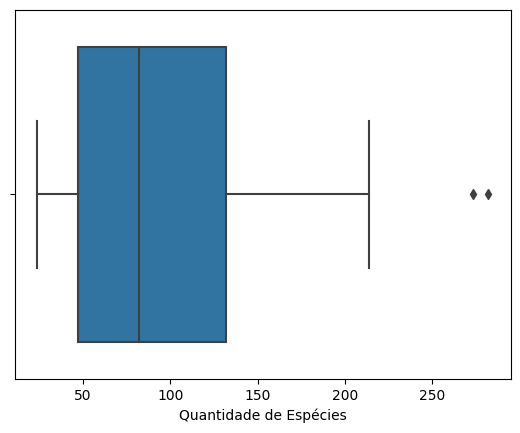

In [28]:
#boxplot da quantidade de espécies por estado
sns.boxplot(df_estados, x="Quantidade de Espécies", orient="h")

'\nInsights:\né possível observar que Bahia, Minas Gerais e São Paulo são os estados com maior número de espécies em risco,\nenquanto Acre, Roraima e Amapá são os estados com o menor número\n\n'

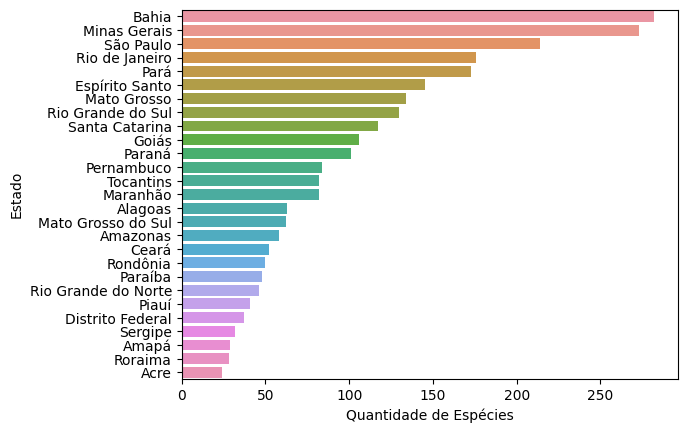

In [29]:
# qual a quantidade de espécies por estado?

df_estados = df_estados.sort_values(by='Quantidade de Espécies', ascending=False)
sns.barplot(df_estados, x="Quantidade de Espécies", y="Estado", errorbar=None)

'''
Insights:
é possível observar que Bahia, Minas Gerais e São Paulo são os estados com maior número de espécies em risco,
enquanto Acre, Roraima e Amapá são os estados com o menor número

'''

'\nInsights:\né possível notar que Pará, Minas Gerais, Bahia e São Paulo são os estados com maior número de espécies consideradas vulneráveis.\nTodos esses 4 estados estão no top5 dos que apresentam a maior quantidade de espécies.\n\nenquanto Amapá, Sergipe e Distrito Federal são o que apresentam menor número\n'

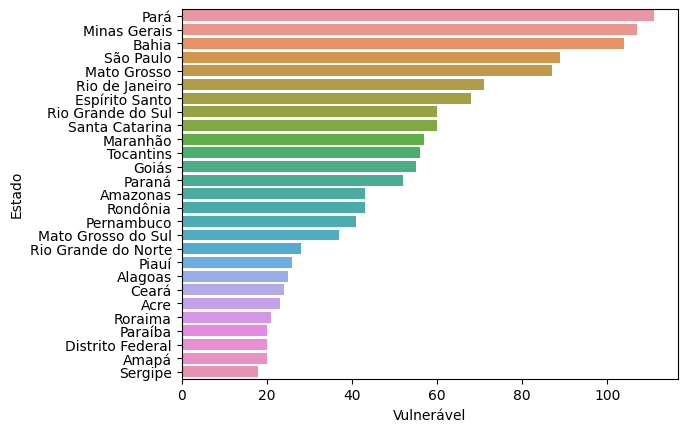

In [30]:
# qual a quantidade de espécies consideradas vulneráveis por estado?


df_estados = df_estados.sort_values(by='Vulnerável', ascending=False)
sns.barplot(df_estados, x="Vulnerável", y="Estado", errorbar=None)

'''
Insights:
é possível notar que Pará, Minas Gerais, Bahia e São Paulo são os estados com maior número de espécies consideradas vulneráveis.
Todos esses 4 estados estão no top5 dos que apresentam a maior quantidade de espécies.

enquanto Amapá, Sergipe e Distrito Federal são o que apresentam menor número
'''

'\ninsights:\né possível observar que Bahia, Minas Gerais e São Paulo são os estados com maior número de espécies em perigo,\nesses três estados também pertence ao top3 geral\n\nAcre, Amapá e Rondônia possuem os menores índices.\n\n'

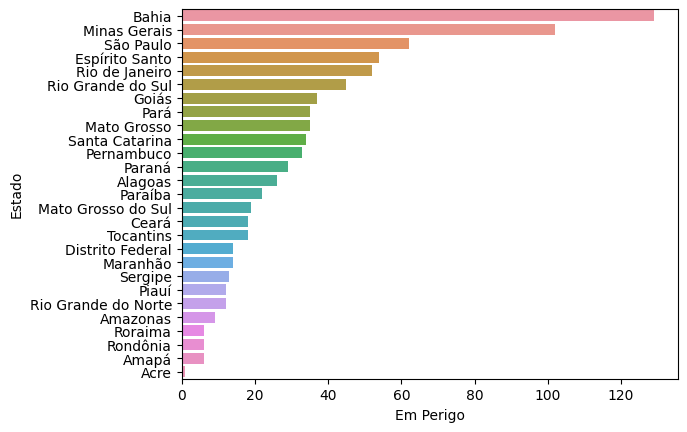

In [31]:
# qual a quantidade de espécies consideradas em perigo por estado?


df_estados = df_estados.sort_values(by='Em Perigo', ascending=False)
sns.barplot(df_estados, x="Em Perigo", y="Estado", errorbar=None)

'''
insights:
é possível observar que Bahia, Minas Gerais e São Paulo são os estados com maior número de espécies em perigo,
esses três estados também pertence ao top3 geral

Acre, Amapá e Rondônia possuem os menores índices.

'''

'\né possível observar que Minas Gerais, São Paulo e Rio de Janeiro são os estados com maior número de espécies em risco,\neles também lideram o top5 dos espécies gerais\n\nAcre, Rondônia e Roraima são os que apresentam menos\n'

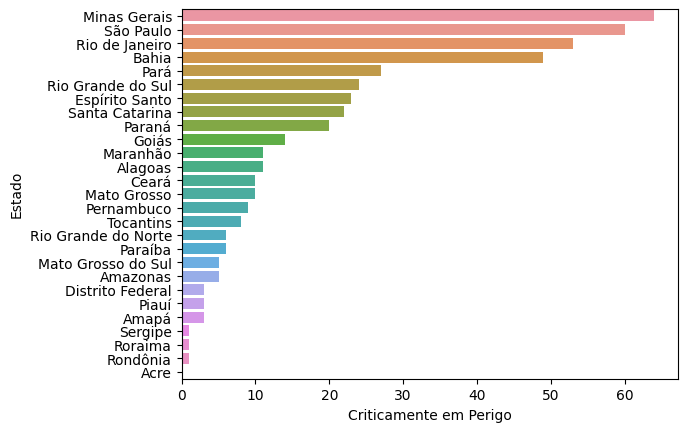

In [32]:
# qual a quantidade de espécies consideradas criticamente em perigo por estado?


df_estados = df_estados.sort_values(by='Criticamente em Perigo', ascending=False)
sns.barplot(df_estados, x="Criticamente em Perigo", y="Estado", errorbar=None)

'''
é possível observar que Minas Gerais, São Paulo e Rio de Janeiro são os estados com maior número de espécies em risco,
eles também lideram o top5 dos espécies gerais

Acre, Rondônia e Roraima são os que apresentam menos
'''

'\nSó há espécies extintas em 8 estados Brasileiros, sendo eles: ...\nSão Paulo, mais uma vez, lidera o ranking.\n'

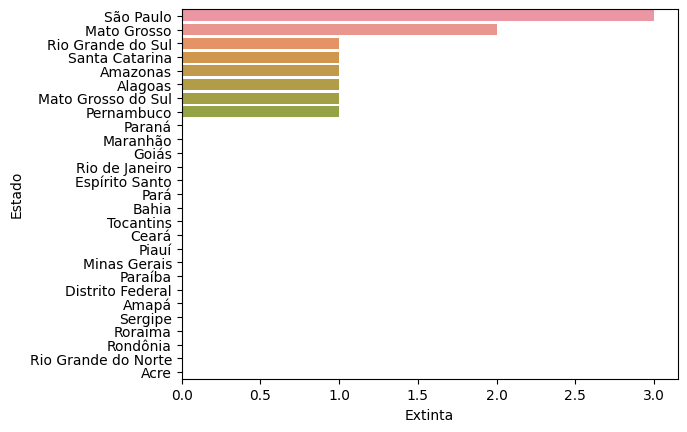

In [34]:
# qual a quantidade de espécies consideradas extintas por estado?

df_estados = df_estados.sort_values(by='Extinta', ascending=False)
sns.barplot(df_estados, x="Extinta", y="Estado", errorbar=None)

'''
Só há espécies extintas em 8 estados Brasileiros, sendo eles: ...
São Paulo, mais uma vez, lidera o ranking.
'''

# Análise por região

In [35]:
# criando novo dataframe por regioes

categoria_por_regiao = []

regioes = ["Sul", "Sudeste", "Centro-Oeste", "Nordeste", "Norte"]

for i in regioes:
    vulneravel_por_regiao = 0
    perigo_por_regiao = 0
    criticamente_em_perigo_por_regiao = 0
    extinta_por_regiao = 0

    index_linha = -1
    for j in df_especies_tratado['Região'].astype(str):
        index_linha = index_linha + 1
        if j.count(i) == 0:
            continue

        if df_especies_tratado['Categoria'][index_linha] == 'Vulnerável':
            vulneravel_por_regiao = vulneravel_por_regiao + 1
        elif df_especies_tratado['Categoria'][index_linha] == 'Em Perigo':
            perigo_por_regiao = perigo_por_regiao + 1
        elif df_especies_tratado['Categoria'][index_linha] == 'Criticamente em Perigo':
            criticamente_em_perigo_por_regiao = criticamente_em_perigo_por_regiao + 1
        elif df_especies_tratado['Categoria'][index_linha] == 'Extinta':
            extinta_por_regiao = extinta_por_regiao + 1
    quantidade_total = vulneravel_por_regiao + perigo_por_regiao + criticamente_em_perigo_por_regiao + extinta_por_regiao
    categoria_por_regiao.append([i, quantidade_total, vulneravel_por_regiao, perigo_por_regiao, criticamente_em_perigo_por_regiao, extinta_por_regiao])

df_regioes = pd.DataFrame(categoria_por_regiao, columns=['Região', 'Quantidade de Espécies', 'Vulnerável', 'Em Perigo', 'Criticamente em Perigo', 'Extinta'])
df_regioes

df_regioes = df_regioes.sort_values(by='Quantidade de Espécies', ascending=False)

df_regioes

,Região,Quantidade de Espécies,Vulnerável,Em Perigo,Criticamente em Perigo,Extinta
1,Sudeste,529,178,177,171,3
3,Nordeste,417,168,162,86,1
4,Norte,247,149,57,40,1
0,Sul,233,93,82,57,1
2,Centro-Oeste,197,108,65,22,2


<Axes: xlabel='Quantidade de Espécies', ylabel='Região'>

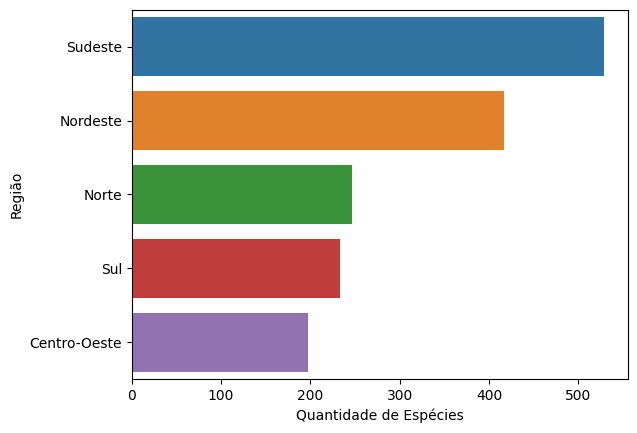

In [37]:
#qual a quantidade de espécies por região?

sns.barplot(df_regioes, x="Quantidade de Espécies", y="Região", estimator=np.median, errorbar=None)

<Axes: xlabel='Vulnerável', ylabel='Região'>

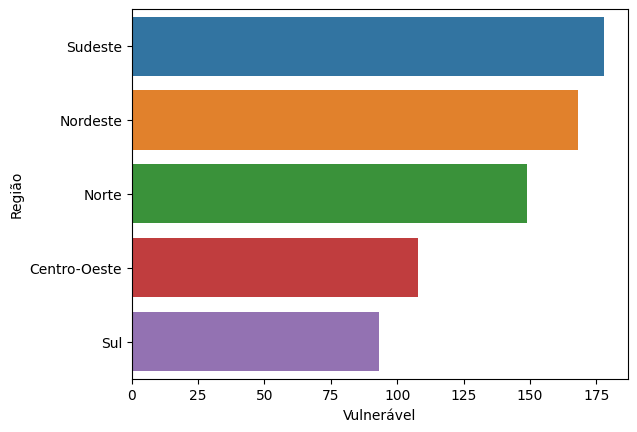

In [38]:
#qual a quantidade de espécies vulneráveis por região?
df_regioes = df_regioes.sort_values(by='Vulnerável', ascending=False)
sns.barplot(df_regioes, x="Vulnerável", y="Região", errorbar=None)

<Axes: xlabel='Em Perigo', ylabel='Região'>

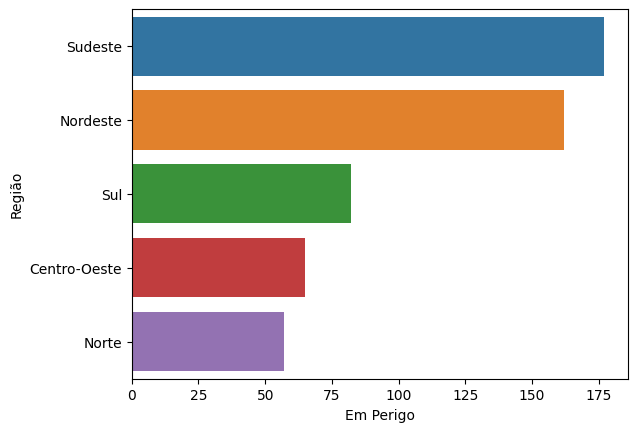

In [39]:
#qual a quantidade de espécies em perigo por região?
df_regioes = df_regioes.sort_values(by='Em Perigo', ascending=False)
sns.barplot(df_regioes, x="Em Perigo", y="Região", errorbar=None)

<Axes: xlabel='Criticamente em Perigo', ylabel='Região'>

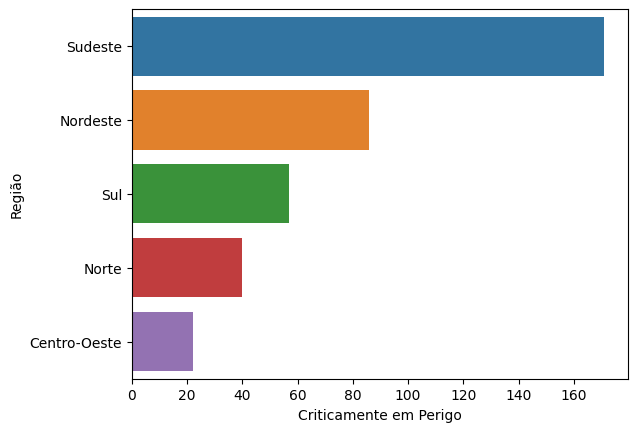

In [40]:
#qual a quantidade de espécies criticamente em perigo por região?
df_regioes = df_regioes.sort_values(by='Criticamente em Perigo', ascending=False)
sns.barplot(df_regioes, x="Criticamente em Perigo", y="Região",errorbar=None)

<Axes: xlabel='Extinta', ylabel='Região'>

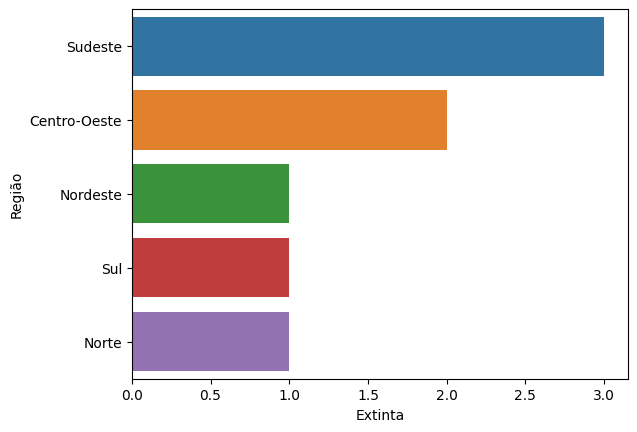

In [41]:
#qual a quantidade de espécies consideradas extintas por região?
df_regioes = df_regioes.sort_values(by='Extinta', ascending=False)
sns.barplot(df_regioes, x="Extinta", y="Região", errorbar=None)